Plotting the results of the training and testing

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# Load the saved data
path = "/hkfs/work/workspace/scratch/rn8463-gamma_hadron/version9/" 
# path = "/hkfs/home/project/hk-project-pevradio/rn8463/gamma_hadron/"
# saved_data = torch.load("/hkfs/work/workspace/scratch/rn8463-gamma_hadron/test0/model/losses_accuracies.pth")
saved_data = torch.load(f"{path}/model/losses_accuracies.pth")

# Retrieve the arrays from the loaded data
train_losses = saved_data["train_losses"]
test_losses = saved_data["test_losses"]
val_losses = saved_data["val_losses"]
train_accuracies = saved_data["train_accuracies"]
test_accuracies = saved_data["test_accuracies"]
val_accuracies = saved_data["val_accuracies"]
num_epochs = len(train_losses)

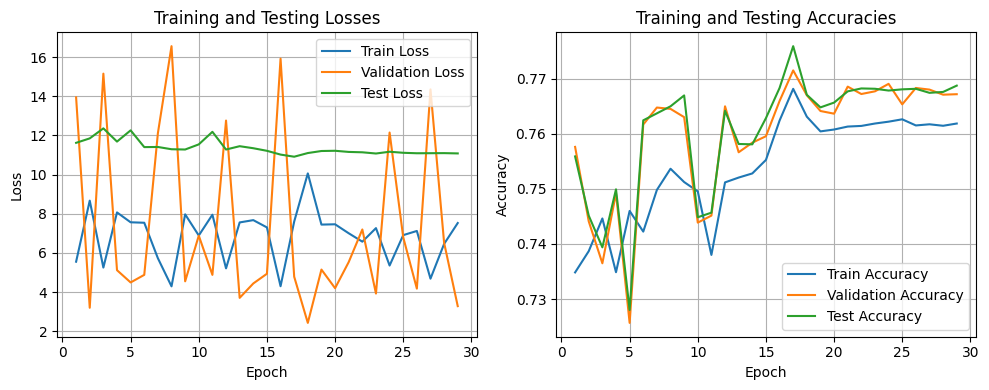

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.title("Training and Testing Losses")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.title("Training and Testing Accuracies")
plt.legend()

plt.tight_layout()
plt.show()
# plt.savefig(f"{args.outputDir}/plots/training_results.png")
# plt.close()

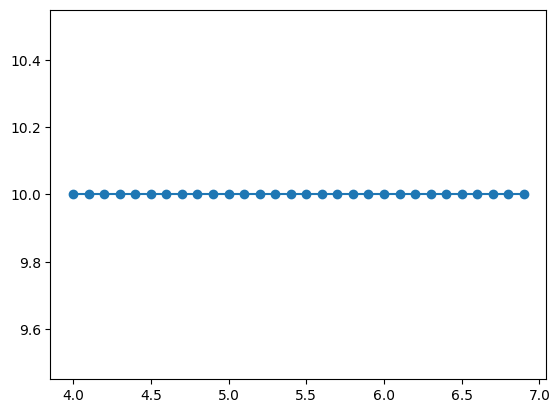

In [35]:
import matplotlib.pyplot as plt
weights = {
    4.0: 10.0,
    4.1: 10.0,
    4.2: 10.0,
    4.3: 10.0,
    4.4: 10.0,
    4.5: 10.0,
    4.6: 10.0,
    4.7: 10.0,
    4.8: 10.0,
    4.9: 10.0,
    5.0: 10.0,
    5.1: 10.0,
    5.2: 10.0,
    5.3: 10.0,
    5.4: 10.0,
    5.5: 10.0,
    5.6: 10.0,
    5.7: 10.0,
    5.8: 10.0,
    5.9: 10.0,
    6.0: 10.0,
    6.1: 10.0,
    6.2: 10.0,
    6.3: 10.0,
    6.4: 10.0,
    6.5: 10.0,
    6.6: 10.0,
    6.7: 10.0,
    6.8: 10.0,
    6.9: 10.0,
}

plt.plot(weights.keys(), weights.values(), "o-")
plt.show()

In [36]:
import numpy as np

def flux_index(weights, index):
    # Convert the weights dictionary to a numpy array
    weights_array = np.array(list(weights.values()))

    # Calculate the flux using vectorized operations
    amax = np.array(sorted(weights.keys()))[-1]
    print(amax)
    f = np.abs(index) * (amax+0.1 - np.array(list(weights.keys())))

    # Update the weights using vectorized operations
    weights_array *= f

    # Find the minimum value and subtract it from all elements
    # minimum = np.amin(weights_array)
    # weights_array -= minimum

    # # Add 1 to all elements
    # weights_array += 1

    # Create a new dictionary with updated weights
    updated_weights = {key: value for key, value in zip(weights.keys(), weights_array)}
    print(updated_weights)

    return updated_weights




In [37]:
index = -3.
weights = flux_index(weights, index)

6.9
{4.0: 90.0, 4.1: 87.00000000000001, 4.2: 83.99999999999999, 4.3: 81.00000000000001, 4.4: 77.99999999999999, 4.5: 75.0, 4.6: 72.00000000000001, 4.7: 69.0, 4.8: 66.0, 4.9: 62.999999999999986, 5.0: 60.0, 5.1: 57.000000000000014, 5.2: 53.99999999999999, 5.3: 51.00000000000001, 5.4: 47.999999999999986, 5.5: 45.0, 5.6: 42.000000000000014, 5.7: 38.99999999999999, 5.8: 36.00000000000001, 5.9: 32.999999999999986, 6.0: 30.0, 6.1: 27.00000000000001, 6.2: 23.999999999999993, 6.3: 21.000000000000007, 6.4: 17.99999999999999, 6.5: 15.0, 6.6: 12.00000000000001, 6.7: 8.999999999999995, 6.8: 6.000000000000005, 6.9: 2.9999999999999893}


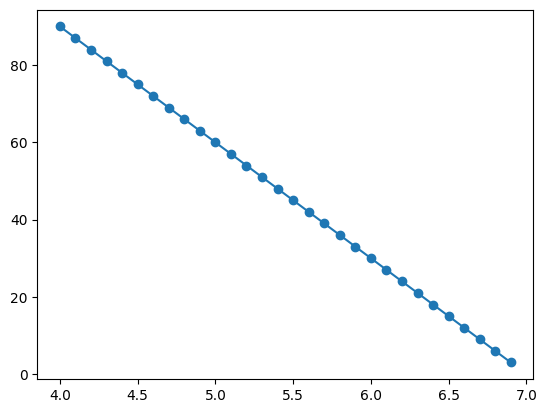

In [38]:

import matplotlib.pyplot as plt
plt.plot(weights.keys(), weights.values(), "o-")
plt.show()

In [3]:
import pandas as pd
import numpy as np
import os 
import icecube 

path ="/hkfs/work/workspace/scratch/rn8463-data_2012/hdf5/"

file  = path +"Level3_IC86.2012_data_Run00120200_Subrun00000000_00000040.hdf5"
df = pd.read_hdf(file, key="data")
df.keys()

ModuleNotFoundError: No module named 'icecube'